In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yahoo_historical import Fetcher

In [2]:
dfINDF = Fetcher('INDF.JK', [2011,1,1], [2019,12,31]).getHistorical()

In [3]:
dfINDF.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,4950.0,4950.0,4825.0,4950.0,3838.854492,14112500.0
1,2011-01-04,5100.0,5100.0,4925.0,5100.0,3955.183105,27676500.0
2,2011-01-05,4950.0,5100.0,4950.0,4950.0,3838.854492,11431000.0
3,2011-01-06,4850.0,4950.0,4825.0,4850.0,3761.302002,14167000.0
4,2011-01-07,4725.0,4875.0,4700.0,4725.0,3664.361328,16699000.0


In [4]:
dfINDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 7 columns):
Date         2245 non-null object
Open         2236 non-null float64
High         2236 non-null float64
Low          2236 non-null float64
Close        2236 non-null float64
Adj Close    2236 non-null float64
Volume       2236 non-null float64
dtypes: float64(6), object(1)
memory usage: 122.9+ KB


In [5]:
dfINDF = dfINDF.fillna(method = 'ffill')

In [6]:
dfINDF['Date'] = pd.to_datetime(dfINDF['Date'])

In [7]:
dfINDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 7 columns):
Date         2245 non-null datetime64[ns]
Open         2245 non-null float64
High         2245 non-null float64
Low          2245 non-null float64
Close        2245 non-null float64
Adj Close    2245 non-null float64
Volume       2245 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 122.9 KB


In [8]:
dfINDF.set_index('Date',inplace=True) #date jadi index

In [9]:
dfINDF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,4950.0,4950.0,4825.0,4950.0,3838.854492,14112500.0
2011-01-04,5100.0,5100.0,4925.0,5100.0,3955.183105,27676500.0
2011-01-05,4950.0,5100.0,4950.0,4950.0,3838.854492,11431000.0
2011-01-06,4850.0,4950.0,4825.0,4850.0,3761.302002,14167000.0
2011-01-07,4725.0,4875.0,4700.0,4725.0,3664.361328,16699000.0
...,...,...,...,...,...,...
2019-12-20,7850.0,7925.0,7800.0,7925.0,7925.000000,10539600.0
2019-12-23,8000.0,8050.0,7900.0,7950.0,7950.000000,5099500.0
2019-12-26,7850.0,7950.0,7800.0,7800.0,7800.000000,5716000.0


C:\Users\catin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


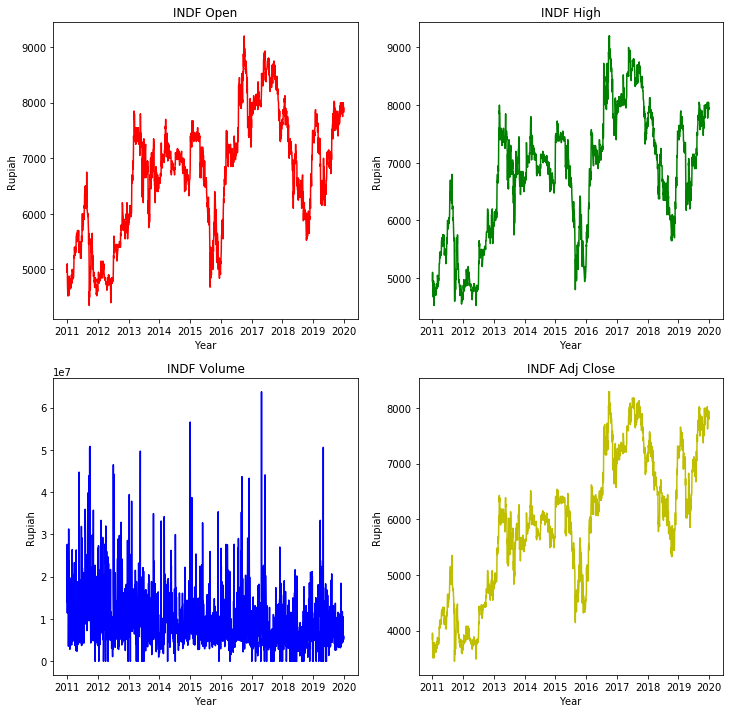

In [10]:
plt.figure(figsize=(12,12))
a = ['Open', 'High', 'Volume', 'Adj Close']
colors = ['r','g', 'b', 'y']
for idx, val in enumerate(a):
    plt.subplot(2,2,idx+1)
    plt.plot(dfINDF[val], color = colors[idx])
    plt.xlabel('Year')
    plt.ylabel('Rupiah')
    plt.title(f'INDF {val}')

(array([138., 182., 222., 191., 298., 458., 343., 232., 139.,  42.]),
 array([4350., 4835., 5320., 5805., 6290., 6775., 7260., 7745., 8230.,
        8715., 9200.]),
 <a list of 10 Patch objects>)

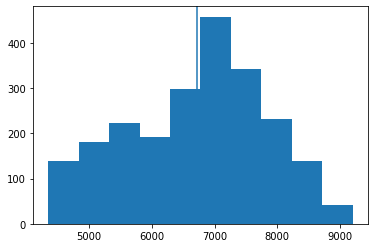

In [14]:
plt.axvline(np.mean(dfINDF['Open']))
plt.hist(dfINDF['Open'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f86fbe4988>,
 'caps': [<matplotlib.lines.Line2D at 0x1f86fbe4b48>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1f86fbe4508>],
 'medians': [<matplotlib.lines.Line2D at 0x1f86fbe5fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f86fbe5c48>],
 'means': []}

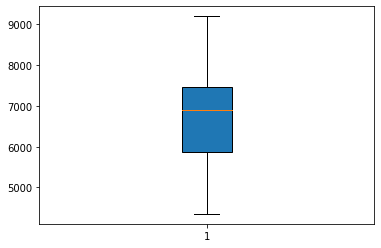

In [22]:
plt.boxplot(dfINDF['Open'],vert=True,patch_artist=True)